This notebook makes plots of the different parameters to isolate some relevant tectonic variables.

In [13]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

from cmcrameri import cm
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rc('font', family='sans-serif') 
mpl.rc('font', serif='Helvetica Neue') 
mpl.rc('text', usetex='false') 
mpl.rcParams.update({'font.size': 8})

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits import axes_grid1

def add_colorbar(im, aspect=20, pad_fraction=0.5, **kwargs):
    """Add a vertical color bar to an image plot."""
    divider = axes_grid1.make_axes_locatable(im.axes)
    width = axes_grid1.axes_size.AxesY(im.axes, aspect=1./aspect)
    pad = axes_grid1.axes_size.Fraction(pad_fraction, width)
    current_ax = plt.gca()
    cax = divider.append_axes("right", size=width, pad=pad)
    plt.sca(current_ax)
    return im.axes.figure.colorbar(im, cax=cax, **kwargs)

In [4]:
# Peridotite densities
perid_density_g_cm3 = 3.3
perid_density_g_km3 = perid_density_g_cm3 * 100000**3
perid_density_g_m3 = perid_density_g_cm3 * 100**3
perid_density_kg_km3 = perid_density_g_km3 * 1e-3
perid_density_kg_m3 = perid_density_g_m3 * 1e-3

In [7]:
with open('./data/subduction_tracks_2022-09-14.pickle', 'rb') as f:
    tracks = pickle.load(f)
    

In [8]:
antigorite_df = pd.read_csv('./data/atg-out_reaction.csv')

# Get min and max presures of antigorite stability
min_ant_pressure = antigorite_df['P_[kbar]'].min()/10
max_ant_pressure = antigorite_df['P_[kbar]'].max()/10
min_ant_temp = antigorite_df['T_[C]'].min()
max_ant_temp = antigorite_df['T_[C]'].max()

In [10]:
# Constrain data to below antigorite stability??
#tmp_df = tracks[(tracks['temp_SYR10_MODEL'] > 0)
#               &(tracks['temp_SYR10_MODEL'] < max_ant_temp)
#               &(tracks['pressure_MODEL'] > 0)
#               &(tracks['pressure_MODEL'] < max_ant_pressure)
#               ]

tmp_df = tracks

# Boundary parameters
perids_points = tmp_df['point_perids'].values
perids_vols = tmp_df['volume_perids'].values
perids_fraction = tmp_df['fractional_perids'].values
SRs = tmp_df['point_spread_rates'].values
age = tmp_df['point_slab_ages'].values
conv = tmp_df['point_conv_rates'].values

# Slab2 variables
dips_SLAB2 = tmp_df['point_SLAB2_dips'].values
pressure_SLAB2 = tmp_df['pressure_SLAB2'].values
temp_SLAB2 = tmp_df['temp_SYR10_SLAB2'].values

# Modelled variables
dips_MODEL = tmp_df['point_MODEL_dips'].values
pressure_MODEL = tmp_df['pressure_MODEL'].values
temp_MODEL = tmp_df['temp_SYR10_MODEL'].values

# Have to filter slab2 values against nans?
#perids = perids[~np.isnan(dips)]
#SRs  = SRs[~np.isnan(dips)]
#age  = age[~np.isnan(dips)]
#conv  = conv[~np.isnan(dips)]
#pressure  = pressure[~np.isnan(dips)]
#temp  = temp[~np.isnan(dips)]
#total_sub_perid_per_Ma  = total_sub_perid_per_Ma[~np.isnan(dips)]
#dips = dips[~np.isnan(dips)]


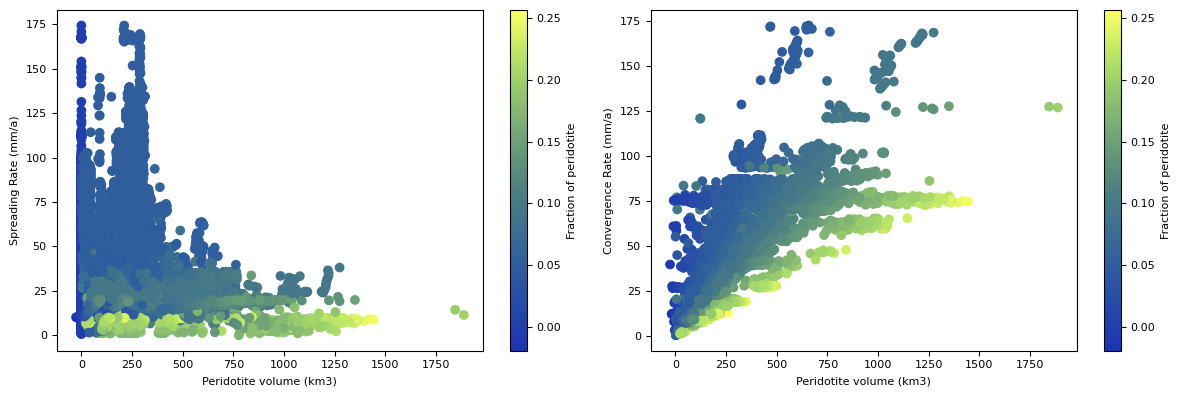

In [11]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
cax1 = ax1.scatter(perids_vols[SRs>0], SRs[SRs>0], c=perids_fraction[SRs>0], cmap=cm.imola)
ax1.set_xlabel('Peridotite volume (km3)')
ax1.set_ylabel('Spreading Rate (mm/a)')
cax1.set_rasterized(True)
fig.colorbar(cax1, ax=ax1, label='Fraction of peridotite')

cax2 = ax2.scatter(perids_vols[conv>0], conv[conv>0], c=perids_fraction[conv>0], cmap=cm.imola)
ax2.set_xlabel('Peridotite volume (km3)')
ax2.set_ylabel('Convergence Rate (mm/a)')
cax2.set_rasterized(True)
fig.colorbar(cax2, ax=ax2, label='Fraction of peridotite')

fig.tight_layout()

#fig.savefig('./figures/perid_vol-SR-CR_rev2.pdf')

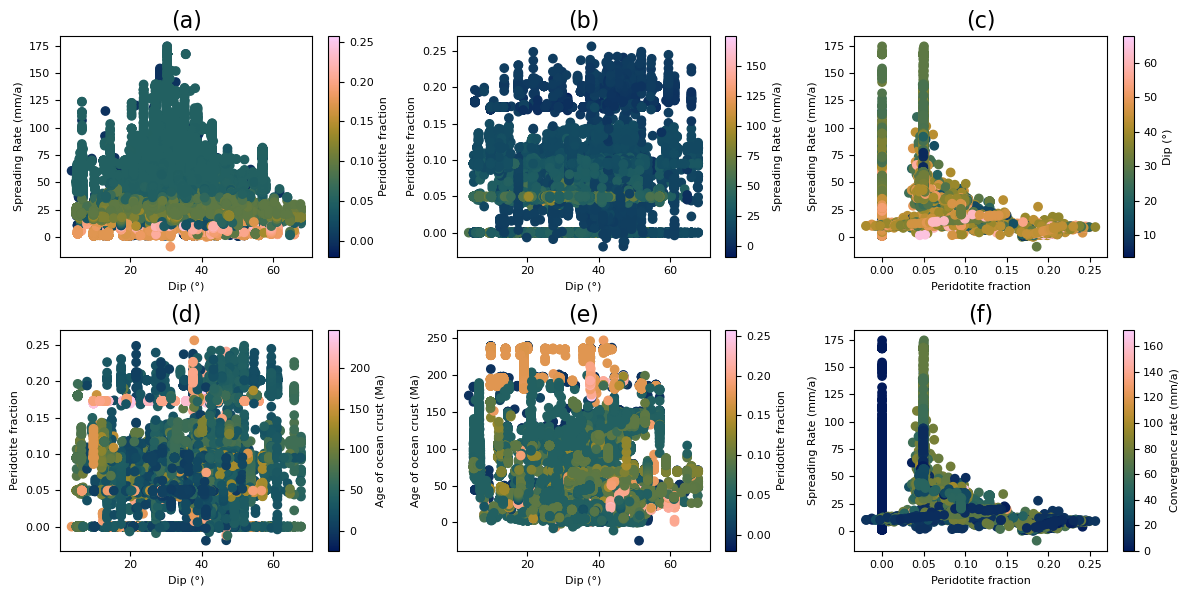

In [12]:
fig, ((ax1, ax2 ,ax3), (ax4, ax5 ,ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(12,6))
cax1 = ax1.scatter(dips_MODEL, SRs, c=perids_fraction, cmap=cm.batlow)
cax2 = ax2.scatter(dips_MODEL, perids_fraction, c=SRs, cmap=cm.batlow)
cax3 = ax3.scatter(perids_fraction, SRs, c=dips_MODEL, cmap=cm.batlow)
cax4 = ax4.scatter(dips_MODEL, perids_fraction, c=age, cmap=cm.batlow)
cax5 = ax5.scatter(dips_MODEL, age, c=perids_fraction, cmap=cm.batlow)
cax6 = ax6.scatter(perids_fraction, SRs, c=conv, cmap=cm.batlow)

ax1.set_xlabel('Dip (°)')
ax2.set_xlabel('Dip (°)')
ax3.set_xlabel('Peridotite fraction')
ax4.set_xlabel('Dip (°)')
ax5.set_xlabel('Dip (°)')
ax6.set_xlabel('Peridotite fraction')

ax1.set_ylabel('Spreading Rate (mm/a)')
ax2.set_ylabel('Peridotite fraction')
ax3.set_ylabel('Spreading Rate (mm/a)')
ax4.set_ylabel('Peridotite fraction')
ax5.set_ylabel('Age of ocean crust (Ma)')
ax6.set_ylabel('Spreading Rate (mm/a)')

ax1.set_title('(a)', fontsize=16)
ax2.set_title('(b)', fontsize=16)
ax3.set_title('(c)', fontsize=16)
ax4.set_title('(d)', fontsize=16)
ax5.set_title('(e)', fontsize=16)
ax6.set_title('(f)', fontsize=16)

fig.colorbar(cax1, ax=ax1, label='Peridotite fraction')
fig.colorbar(cax2, ax=ax2, label='Spreading Rate (mm/a)')
fig.colorbar(cax3, ax=ax3, label='Dip (°)')
fig.colorbar(cax4, ax=ax4, label='Age of ocean crust (Ma)')
fig.colorbar(cax5, ax=ax5, label='Peridotite fraction')
fig.colorbar(cax6, ax=ax6, label='Convergence rate (mm/a)')
fig.tight_layout()

#fig.savefig('./figures/variable_scatterplots_20221006.pdf')


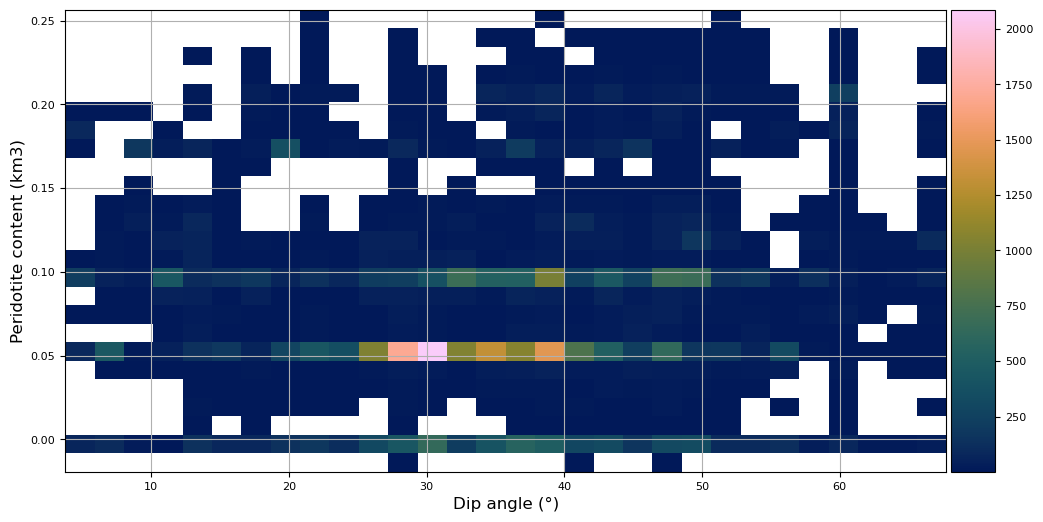

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
im = ax.hist2d(dips_MODEL, perids_fraction, bins=(30,25), cmin=0.00001, cmap=cm.batlow)
ax.set_xlabel('Dip angle (°)', fontsize=12)
ax.set_ylabel('Peridotite content (km3)', fontsize=12)
ax.grid()
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)

fig.colorbar(im[3], cax=cax, orientation='vertical')


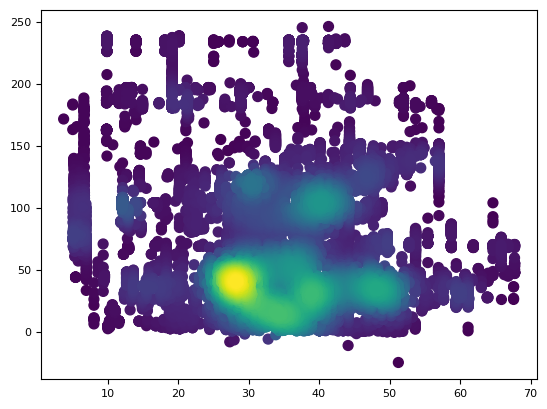

In [15]:
from scipy.stats import gaussian_kde
# Calculate the point density
x=np.asarray(dips_MODEL)
y=np.asarray(age)

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=50)
plt.show()

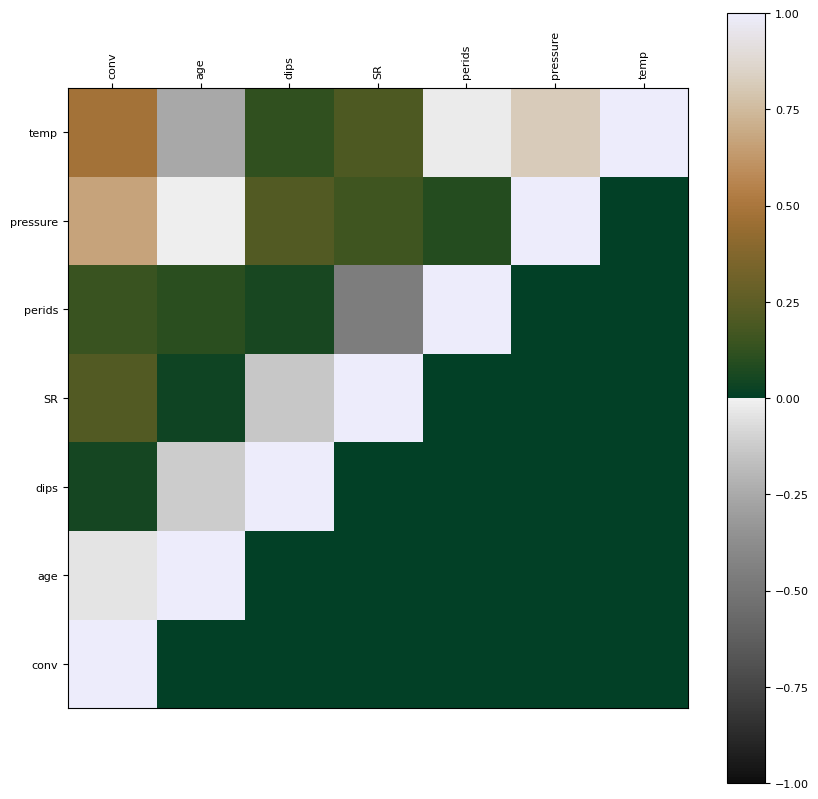

In [16]:
####### correlation coefficient ##########

cov_mat = np.corrcoef(np.vstack((conv, age, dips_MODEL, SRs, perids_fraction, pressure_MODEL, temp_MODEL)))

lab=['conv', 'age', 'dips','SR','perids', 'pressure', 'temp']
matrix_length = len(lab)

for i in range(0,matrix_length):
    cov_mat[i,i+1::] = 0
plt.figure(figsize=(10,10))
plt.imshow(cov_mat, interpolation="nearest", cmap=cm.fes,clim=[-1,1])
plt.gca().invert_yaxis()
plt.gca().xaxis.tick_top()
plt.xticks(np.arange(0,matrix_length),lab, rotation='vertical')
#plt.xticklabels(lab)
plt.yticks(np.arange(0,matrix_length),lab)
#plt.yticklabels(lab)
plt.colorbar()
#plt.savefig('covariance.pdf')

plt.show()

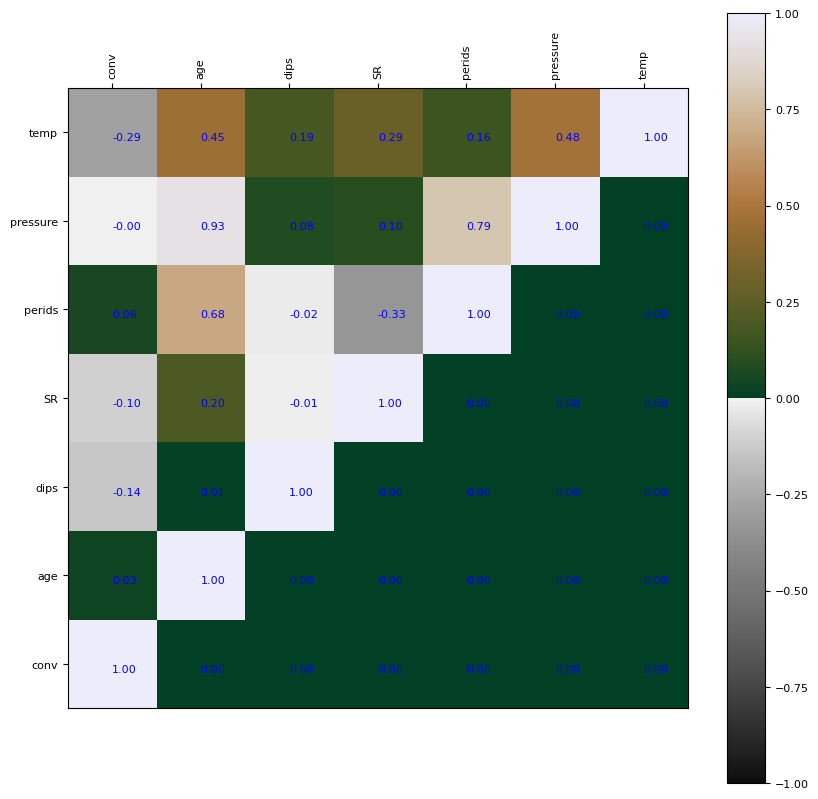

array([[-0.28837515,  0.45320995,  0.18534126,  0.29371537,  0.15561723,
         0.47829904,  1.        ],
       [-0.00110671,  0.93426165,  0.07865043,  0.09516659,  0.79202163,
         1.        ,  0.        ],
       [ 0.05773999,  0.68297005, -0.01563544, -0.3338007 ,  1.        ,
         0.        ,  0.        ],
       [-0.10419061,  0.19717515, -0.01427275,  1.        ,  0.        ,
         0.        ,  0.        ],
       [-0.13993026,  0.00970813,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.03281996,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ]])

In [17]:
####### log correlation coefficient ##########
#need to change 0s in conv to 1
conv_log = conv.copy()
conv_log[conv_log == 0] = 1
SRs_log = SRs.copy()
SRs_log[SRs_log <= 0] = 1
age_log = age.copy()
age_log[age_log <= 0] = 1
perids_log = perids_fraction.copy()
perids_log[perids_log <= 0] = 0.01

cov_mat = np.corrcoef(np.vstack((np.log(age_log), np.log(conv_log), 
                                 np.log(dips_MODEL), np.log(SRs_log), np.log(perids_log),
                                np.log(pressure_MODEL), np.log(temp_MODEL))))
#cov_mat = scipy.stats.spearmanr(np.vstack((np.log(conv), np.log(age), np.log(dips), np.log(SRs), np.log(perids))))

lab=['conv', 'age', 'dips','SR','perids', 'pressure', 'temp']
matrix_length = len(lab)

for i in range(0,matrix_length):
    cov_mat[i,i+1::] = 0
plt.figure(figsize=(10,10))
plt.imshow(cov_mat, interpolation="nearest", cmap=cm.fes,clim=[-1,1])
plt.gca().invert_yaxis()
plt.gca().xaxis.tick_top()
plt.xticks(np.arange(0,matrix_length),lab, rotation='vertical')
#plt.xticklabels(lab)
plt.yticks(np.arange(0,matrix_length),lab)
#plt.yticklabels(lab)
plt.colorbar()
#plt.savefig('covariance.pdf')

for y in range(cov_mat.shape[0]):
    for x in range(cov_mat.shape[1]):
        plt.text(x, y, '%.2f' % cov_mat[y,x],
         ha='left',va='top', color='b')
plt.show()
np.flip(cov_mat, axis=0)

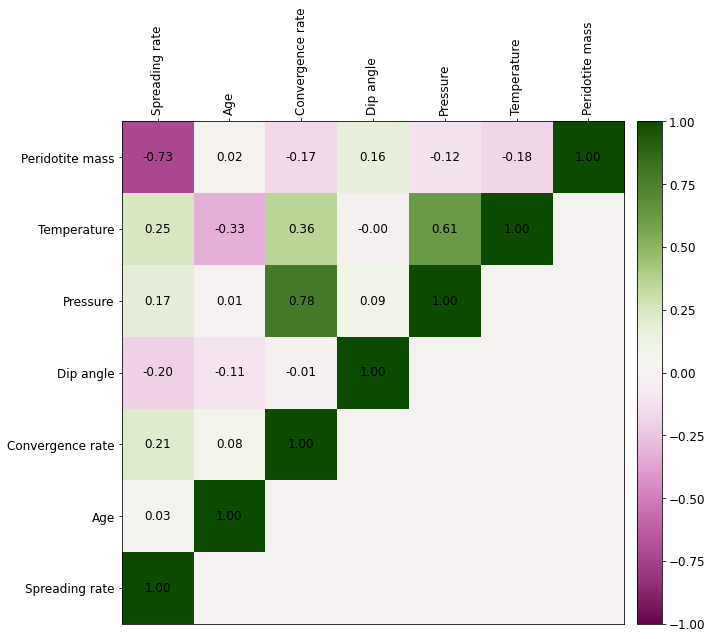

In [34]:
#spearman correlation
df = pd.DataFrame({'SRs': SRs,
                   'age': age,
                   'conv': conv,
                   'dips': dips_MODEL,
                   'pressure': pressure_MODEL,
                   'temp': temp_MODEL,
                   'perids': perids_points})

corr = df.corr(method = 'spearman')
corr = np.asarray(corr)
lab=['Spreading rate',
     'Age',
     'Convergence rate',
     'Dip angle',
     'Pressure',
     'Temperature',
     'Peridotite mass']
matrix_length = len(lab)

for i in range(0,matrix_length):
    corr[i,i+1::] = 0
    
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))

im = ax.imshow(np.asarray(corr), cmap=cm.bam,clim=[-1,1], interpolation="nearest",)#, cmap=cm.fes,)
cbar = add_colorbar(im)
cbar.ax.tick_params(labelsize=12)

fig.gca().invert_yaxis()
fig.gca().xaxis.tick_top()
ax.set_xticks(np.arange(0,matrix_length))
ax.set_xticklabels(lab, rotation='vertical', fontsize=12)
ax.set_yticks(np.arange(0,matrix_length))
ax.set_yticklabels(lab, rotation='horizontal', fontsize=12)
for y in range(corr.shape[0]):
    for x in range(corr.shape[1]):
#        print(corr[x,y])
        if corr[y,x] == 0.0:
            continue
        else:
            ax.text(x, y, '%.2f' % corr[y,x], ha='center',va='center',
             color='k', fontsize=12)
#ax.text(-1,7,'d', fontsize=40)
fig.tight_layout()
#fig.savefig('./figures/Spearman_coeff_fraction_perid_v3.pdf')

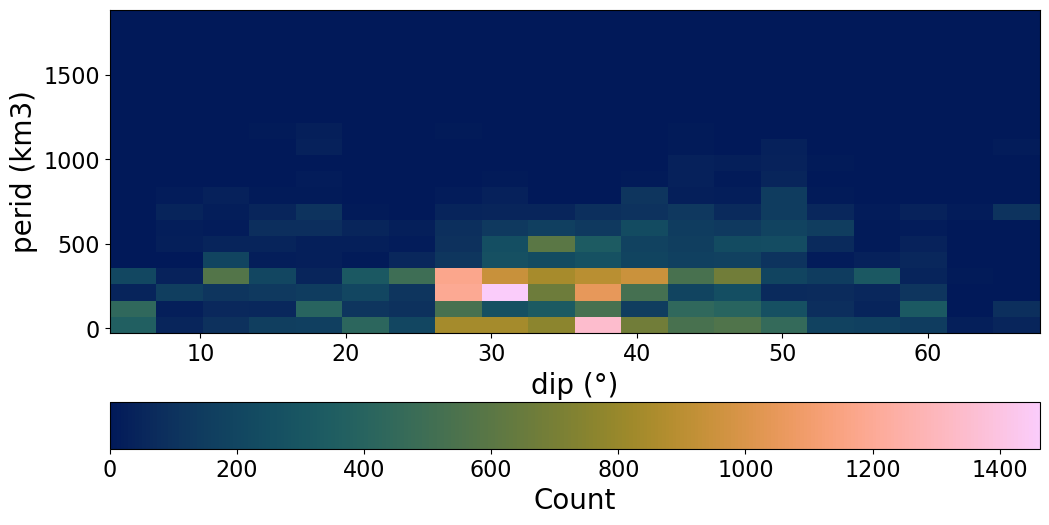

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
hist = ax.hist2d(dips_MODEL, perids_vols, (20, 20), cmap=cm.batlow)
#ax.set_ylim(0,1000)
ax.set_xlabel('dip (°)', fontsize=20)
ax.set_ylabel('perid (km3)', fontsize=20)
ax.tick_params(axis='both', labelsize=16)

cbar = fig.colorbar(hist[3], ax=ax, orientation='horizontal')
cbar.set_label('Count', fontsize=20)
cbar.ax.tick_params(labelsize=16)